In [1]:
import torch
import matplotlib.pyplot as plt

import time

import os.path as osp
import numpy as np

from dataset import make_dataset
from train import make_data_loader, train_step, test_evaluations, save_model_GCN
from utils import get_device, plot_training_progress
from model import GCNNetwork

from args import *
from utils import *

/root/anaconda3/envs/material/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_dataset, validation_dataset, test_dataset = make_dataset()
train_loader, val_loader, test_loader = make_data_loader(train_dataset, validation_dataset, test_dataset)

/root/anaconda3/envs/material/lib/python3.12/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 16, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
print(len(train_dataset), len(validation_dataset), len(test_dataset))

device = get_device()

in_dim = train_dataset[0].x.shape[-1]
model = GCNNetwork(in_dim)
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode=args["sche_mode"], factor=args["sche_factor"], patience=args["sche_patience"], min_lr=args["sche_min_lr"])

29274 6273 6272


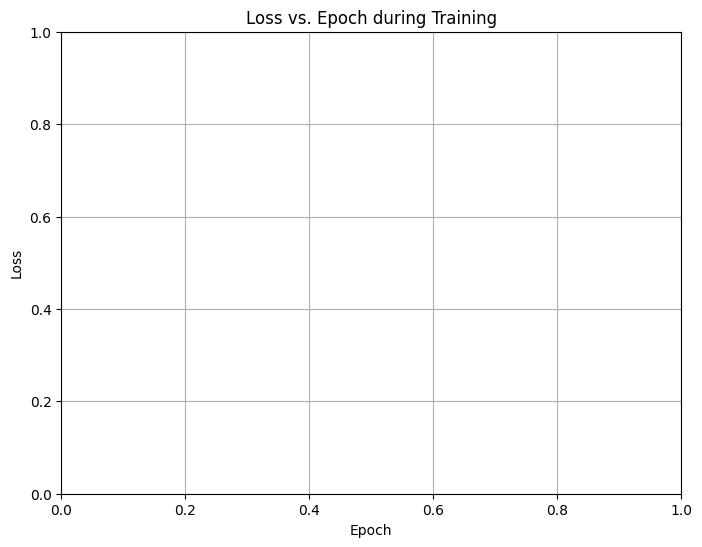

In [4]:
result_path = createResultFolder()
test_best_loss = None
epoch = None

train_losses = []
test_losses = []
val_losses = []

plt.figure(figsize=(8, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch during Training")
plt.grid(True)

Epoch 1, train loss(MAE)=0.2304, valid loss(MAE)=0.0767, test loss(MAE)=0.0793, lr=0.01, best_test=0.0793
Epoch 2, train loss(MAE)=0.0762, valid loss(MAE)=0.0507, test loss(MAE)=0.0534, lr=0.01, best_test=0.0534
Epoch 3, train loss(MAE)=0.0544, valid loss(MAE)=0.04, test loss(MAE)=0.0419, lr=0.01, best_test=0.0419
Epoch 4, train loss(MAE)=0.0569, valid loss(MAE)=0.0738, test loss(MAE)=0.0753, lr=0.01, best_test=0.0419
Epoch 5, train loss(MAE)=0.0667, valid loss(MAE)=0.0642, test loss(MAE)=0.0645, lr=0.01, best_test=0.0419
Epoch 6, train loss(MAE)=0.0553, valid loss(MAE)=0.0322, test loss(MAE)=0.034, lr=0.01, best_test=0.034
Epoch 7, train loss(MAE)=0.0613, valid loss(MAE)=0.0926, test loss(MAE)=0.0972, lr=0.01, best_test=0.034
Epoch 8, train loss(MAE)=0.0584, valid loss(MAE)=0.0567, test loss(MAE)=0.0591, lr=0.01, best_test=0.034
Epoch 9, train loss(MAE)=0.0457, valid loss(MAE)=0.0267, test loss(MAE)=0.028, lr=0.01, best_test=0.028
Epoch 10, train loss(MAE)=0.0407, valid loss(MAE)=0.03

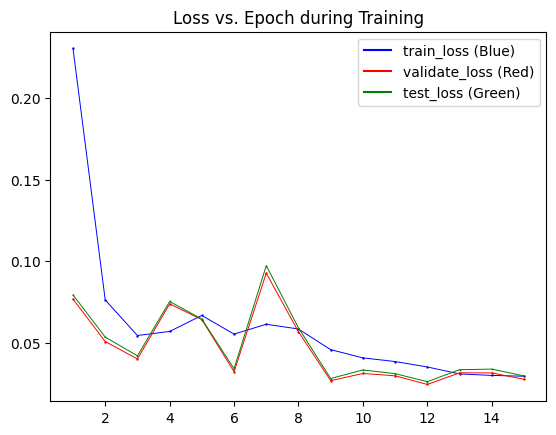

Epoch 15, train loss(MAE)=0.0294, valid loss(MAE)=0.0276, test loss(MAE)=0.0297, lr=0.01, best_test=0.0261
Epoch 16, train loss(MAE)=0.0302, valid loss(MAE)=0.0222, test loss(MAE)=0.0239, lr=0.01, best_test=0.0239
Epoch 17, train loss(MAE)=0.0302, valid loss(MAE)=0.0248, test loss(MAE)=0.0264, lr=0.01, best_test=0.0239
Epoch 18, train loss(MAE)=0.0294, valid loss(MAE)=0.0255, test loss(MAE)=0.0274, lr=0.01, best_test=0.0239
Epoch 19, train loss(MAE)=0.0283, valid loss(MAE)=0.0266, test loss(MAE)=0.0282, lr=0.01, best_test=0.0239
Epoch 20, train loss(MAE)=0.0273, valid loss(MAE)=0.0342, test loss(MAE)=0.0369, lr=0.01, best_test=0.0239
Epoch 21, train loss(MAE)=0.0344, valid loss(MAE)=0.033, test loss(MAE)=0.0351, lr=0.01, best_test=0.0239
Epoch 22, train loss(MAE)=0.0255, valid loss(MAE)=0.0263, test loss(MAE)=0.0277, lr=0.01, best_test=0.0239
Epoch 23, train loss(MAE)=0.0254, valid loss(MAE)=0.0248, test loss(MAE)=0.0256, lr=0.01, best_test=0.0239
Epoch 24, train loss(MAE)=0.0292, vali

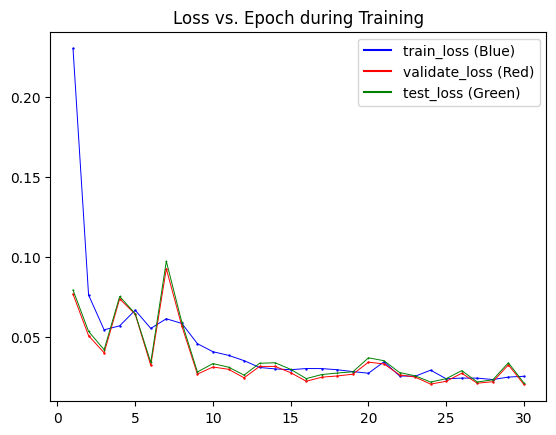

Epoch 30, train loss(MAE)=0.0253, valid loss(MAE)=0.0202, test loss(MAE)=0.0211, lr=0.01, best_test=0.0211
Epoch 31, train loss(MAE)=0.027, valid loss(MAE)=0.0285, test loss(MAE)=0.0288, lr=0.01, best_test=0.0211
Epoch 32, train loss(MAE)=0.0271, valid loss(MAE)=0.0241, test loss(MAE)=0.0247, lr=0.01, best_test=0.0211
Epoch 33, train loss(MAE)=0.0256, valid loss(MAE)=0.0232, test loss(MAE)=0.024, lr=0.01, best_test=0.0211
Epoch 34, train loss(MAE)=0.0232, valid loss(MAE)=0.0211, test loss(MAE)=0.0219, lr=0.01, best_test=0.0211
Epoch 35, train loss(MAE)=0.0253, valid loss(MAE)=0.0203, test loss(MAE)=0.0211, lr=0.01, best_test=0.0211
Epoch 36, train loss(MAE)=0.0229, valid loss(MAE)=0.0277, test loss(MAE)=0.0288, lr=0.01, best_test=0.0211
Epoch 37, train loss(MAE)=0.0242, valid loss(MAE)=0.0253, test loss(MAE)=0.0263, lr=0.01, best_test=0.0211
Epoch 38, train loss(MAE)=0.0251, valid loss(MAE)=0.0201, test loss(MAE)=0.0206, lr=0.01, best_test=0.0206
Epoch 39, train loss(MAE)=0.0226, valid

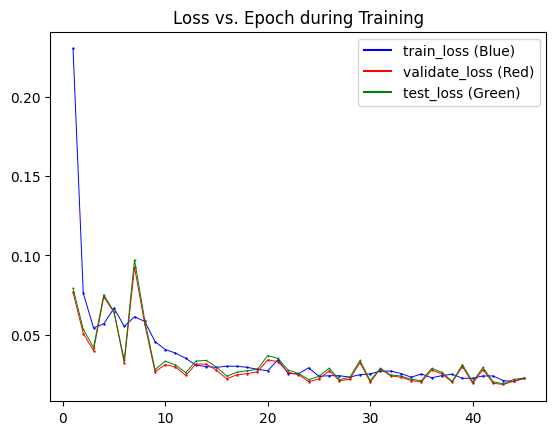

Epoch 45, train loss(MAE)=0.0225, valid loss(MAE)=0.0225, test loss(MAE)=0.0228, lr=0.01, best_test=0.0191
Epoch 46, train loss(MAE)=0.0205, valid loss(MAE)=0.0188, test loss(MAE)=0.0195, lr=0.01, best_test=0.0191
Epoch 47, train loss(MAE)=0.0208, valid loss(MAE)=0.0187, test loss(MAE)=0.0193, lr=0.01, best_test=0.0191
Epoch 48, train loss(MAE)=0.0206, valid loss(MAE)=0.0195, test loss(MAE)=0.0199, lr=0.01, best_test=0.0191
Epoch 49, train loss(MAE)=0.0222, valid loss(MAE)=0.019, test loss(MAE)=0.0194, lr=0.01, best_test=0.0191
Epoch 50, train loss(MAE)=0.0205, valid loss(MAE)=0.0187, test loss(MAE)=0.0192, lr=0.01, best_test=0.0191
Epoch 51, train loss(MAE)=0.0202, valid loss(MAE)=0.0202, test loss(MAE)=0.0206, lr=0.01, best_test=0.0191
Epoch 52, train loss(MAE)=0.0212, valid loss(MAE)=0.0195, test loss(MAE)=0.0199, lr=0.01, best_test=0.0191
Epoch 53, train loss(MAE)=0.0205, valid loss(MAE)=0.0188, test loss(MAE)=0.0193, lr=0.01, best_test=0.0191
Epoch 54, train loss(MAE)=0.0197, vali

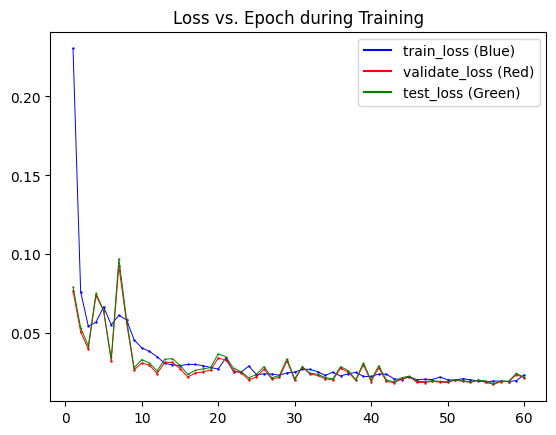

Epoch 60, train loss(MAE)=0.0235, valid loss(MAE)=0.0219, test loss(MAE)=0.0221, lr=0.01, best_test=0.018
Epoch 61, train loss(MAE)=0.0212, valid loss(MAE)=0.0177, test loss(MAE)=0.0181, lr=0.01, best_test=0.018
Epoch 62, train loss(MAE)=0.0193, valid loss(MAE)=0.018, test loss(MAE)=0.0181, lr=0.01, best_test=0.018
Epoch 63, train loss(MAE)=0.0203, valid loss(MAE)=0.0248, test loss(MAE)=0.0256, lr=0.01, best_test=0.018
Epoch 64, train loss(MAE)=0.0219, valid loss(MAE)=0.0187, test loss(MAE)=0.0191, lr=0.01, best_test=0.018
Epoch 65, train loss(MAE)=0.0188, valid loss(MAE)=0.0247, test loss(MAE)=0.0252, lr=0.01, best_test=0.018
Epoch 66, train loss(MAE)=0.0195, valid loss(MAE)=0.0188, test loss(MAE)=0.0189, lr=0.01, best_test=0.018
Epoch 67, train loss(MAE)=0.0192, valid loss(MAE)=0.0182, test loss(MAE)=0.0179, lr=0.01, best_test=0.0179
Epoch 68, train loss(MAE)=0.0187, valid loss(MAE)=0.021, test loss(MAE)=0.0214, lr=0.01, best_test=0.0179
Epoch 69, train loss(MAE)=0.0186, valid loss(M

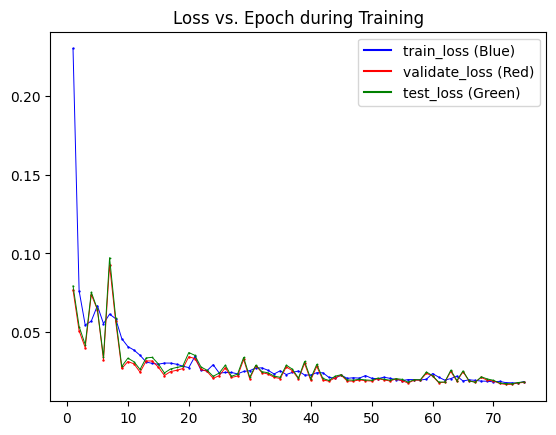

Epoch 75, train loss(MAE)=0.0184, valid loss(MAE)=0.0178, test loss(MAE)=0.0182, lr=0.01, best_test=0.017
Epoch 76, train loss(MAE)=0.0177, valid loss(MAE)=0.0169, test loss(MAE)=0.0168, lr=0.01, best_test=0.0168
Epoch 77, train loss(MAE)=0.0174, valid loss(MAE)=0.0202, test loss(MAE)=0.0206, lr=0.01, best_test=0.0168
Epoch 78, train loss(MAE)=0.0181, valid loss(MAE)=0.0184, test loss(MAE)=0.0188, lr=0.01, best_test=0.0168
Epoch 79, train loss(MAE)=0.0181, valid loss(MAE)=0.0183, test loss(MAE)=0.0184, lr=0.01, best_test=0.0168
Epoch 80, train loss(MAE)=0.0178, valid loss(MAE)=0.0206, test loss(MAE)=0.0208, lr=0.01, best_test=0.0168
Epoch 81, train loss(MAE)=0.0173, valid loss(MAE)=0.0173, test loss(MAE)=0.0174, lr=0.01, best_test=0.0168
Epoch 82, train loss(MAE)=0.018, valid loss(MAE)=0.0168, test loss(MAE)=0.0171, lr=0.01, best_test=0.0168
Epoch 83, train loss(MAE)=0.0171, valid loss(MAE)=0.0173, test loss(MAE)=0.0176, lr=0.01, best_test=0.0168
Epoch 84, train loss(MAE)=0.0175, valid

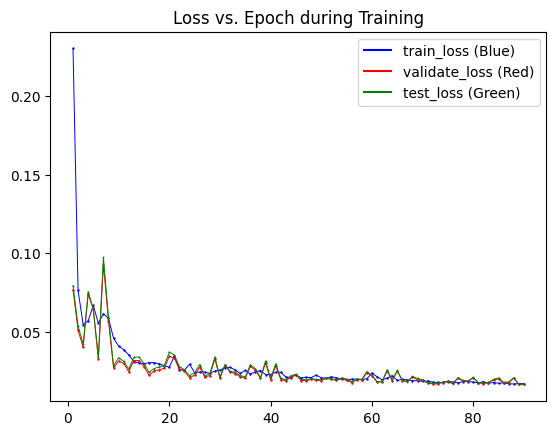

Epoch 90, train loss(MAE)=0.0168, valid loss(MAE)=0.0162, test loss(MAE)=0.0165, lr=0.01, best_test=0.0165
Epoch 91, train loss(MAE)=0.0165, valid loss(MAE)=0.0158, test loss(MAE)=0.0162, lr=0.01, best_test=0.0162
Epoch 92, train loss(MAE)=0.0165, valid loss(MAE)=0.0173, test loss(MAE)=0.0174, lr=0.01, best_test=0.0162
Epoch 93, train loss(MAE)=0.017, valid loss(MAE)=0.0158, test loss(MAE)=0.0159, lr=0.01, best_test=0.0159
Epoch 94, train loss(MAE)=0.0168, valid loss(MAE)=0.0165, test loss(MAE)=0.017, lr=0.01, best_test=0.0159
Epoch 95, train loss(MAE)=0.0161, valid loss(MAE)=0.0161, test loss(MAE)=0.0167, lr=0.01, best_test=0.0159
Epoch 96, train loss(MAE)=0.0166, valid loss(MAE)=0.0192, test loss(MAE)=0.0198, lr=0.01, best_test=0.0159
Epoch 97, train loss(MAE)=0.0167, valid loss(MAE)=0.015, test loss(MAE)=0.015, lr=0.01, best_test=0.015
Epoch 98, train loss(MAE)=0.0178, valid loss(MAE)=0.016, test loss(MAE)=0.0161, lr=0.01, best_test=0.015
Epoch 99, train loss(MAE)=0.0159, valid loss

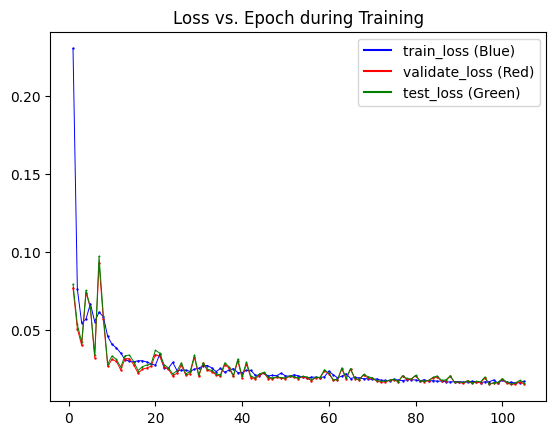

Epoch 105, train loss(MAE)=0.017, valid loss(MAE)=0.0153, test loss(MAE)=0.0162, lr=0.01, best_test=0.015
Epoch 106, train loss(MAE)=0.0175, valid loss(MAE)=0.0158, test loss(MAE)=0.0162, lr=0.01, best_test=0.015
Epoch 107, train loss(MAE)=0.0155, valid loss(MAE)=0.0157, test loss(MAE)=0.0159, lr=0.01, best_test=0.015
Epoch 108, train loss(MAE)=0.0154, valid loss(MAE)=0.0161, test loss(MAE)=0.0171, lr=0.01, best_test=0.015
Epoch 109, train loss(MAE)=0.0155, valid loss(MAE)=0.0156, test loss(MAE)=0.0157, lr=0.01, best_test=0.015
Epoch 110, train loss(MAE)=0.0154, valid loss(MAE)=0.0175, test loss(MAE)=0.0178, lr=0.01, best_test=0.015
Epoch 111, train loss(MAE)=0.0152, valid loss(MAE)=0.0165, test loss(MAE)=0.0177, lr=0.01, best_test=0.015
Epoch 112, train loss(MAE)=0.0155, valid loss(MAE)=0.0159, test loss(MAE)=0.0163, lr=0.01, best_test=0.015
Epoch 113, train loss(MAE)=0.0159, valid loss(MAE)=0.0154, test loss(MAE)=0.0156, lr=0.01, best_test=0.015
Epoch 114, train loss(MAE)=0.0152, val

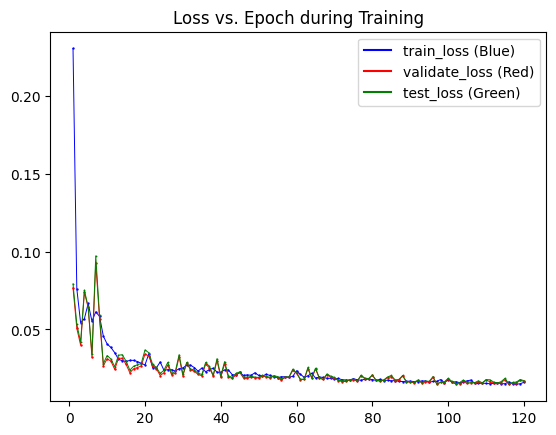

Epoch 120, train loss(MAE)=0.0161, valid loss(MAE)=0.0167, test loss(MAE)=0.0172, lr=0.01, best_test=0.015
Epoch 121, train loss(MAE)=0.0168, valid loss(MAE)=0.015, test loss(MAE)=0.0156, lr=0.01, best_test=0.015
Epoch 122, train loss(MAE)=0.0157, valid loss(MAE)=0.0154, test loss(MAE)=0.0163, lr=0.01, best_test=0.015
Epoch 123, train loss(MAE)=0.0155, valid loss(MAE)=0.0157, test loss(MAE)=0.0162, lr=0.01, best_test=0.015
Epoch 124, train loss(MAE)=0.0145, valid loss(MAE)=0.0157, test loss(MAE)=0.0162, lr=0.01, best_test=0.015
Epoch 125, train loss(MAE)=0.0147, valid loss(MAE)=0.016, test loss(MAE)=0.0161, lr=0.01, best_test=0.015
Epoch 126, train loss(MAE)=0.0151, valid loss(MAE)=0.0158, test loss(MAE)=0.0162, lr=0.01, best_test=0.015
Epoch 127, train loss(MAE)=0.015, valid loss(MAE)=0.0158, test loss(MAE)=0.0161, lr=0.01, best_test=0.015
Epoch 128, train loss(MAE)=0.015, valid loss(MAE)=0.0144, test loss(MAE)=0.015, lr=0.01, best_test=0.015
Epoch 129, train loss(MAE)=0.0147, valid l

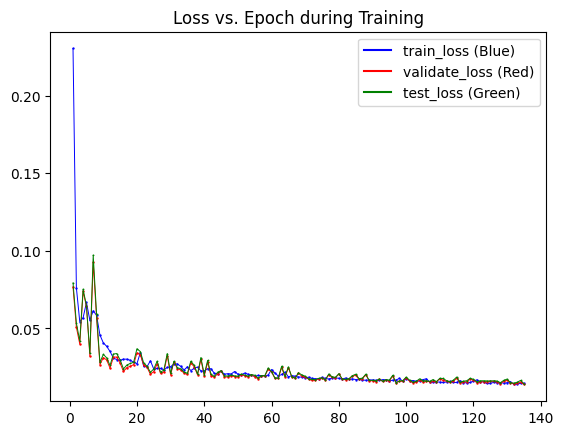

Epoch 135, train loss(MAE)=0.0146, valid loss(MAE)=0.0139, test loss(MAE)=0.0144, lr=0.01, best_test=0.0144
Epoch 136, train loss(MAE)=0.0145, valid loss(MAE)=0.0151, test loss(MAE)=0.0155, lr=0.01, best_test=0.0144
Epoch 137, train loss(MAE)=0.0156, valid loss(MAE)=0.0149, test loss(MAE)=0.0155, lr=0.01, best_test=0.0144
Epoch 138, train loss(MAE)=0.0146, valid loss(MAE)=0.0163, test loss(MAE)=0.017, lr=0.01, best_test=0.0144
Epoch 139, train loss(MAE)=0.0144, valid loss(MAE)=0.0142, test loss(MAE)=0.0152, lr=0.01, best_test=0.0144
Epoch 140, train loss(MAE)=0.0139, valid loss(MAE)=0.0171, test loss(MAE)=0.0177, lr=0.01, best_test=0.0144
Epoch 141, train loss(MAE)=0.0143, valid loss(MAE)=0.0147, test loss(MAE)=0.0153, lr=0.01, best_test=0.0144
Epoch 142, train loss(MAE)=0.0141, valid loss(MAE)=0.0149, test loss(MAE)=0.0154, lr=0.01, best_test=0.0144
Epoch 143, train loss(MAE)=0.0142, valid loss(MAE)=0.0152, test loss(MAE)=0.0157, lr=0.01, best_test=0.0144
Epoch 144, train loss(MAE)=0.

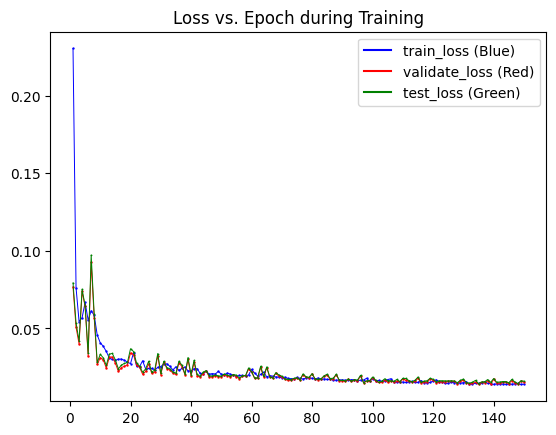

Epoch 150, train loss(MAE)=0.0141, valid loss(MAE)=0.0154, test loss(MAE)=0.016, lr=0.01, best_test=0.0144
Epoch 151, train loss(MAE)=0.0143, valid loss(MAE)=0.0148, test loss(MAE)=0.0152, lr=0.01, best_test=0.0144
Epoch 152, train loss(MAE)=0.0137, valid loss(MAE)=0.0139, test loss(MAE)=0.0142, lr=0.01, best_test=0.0142
Epoch 153, train loss(MAE)=0.014, valid loss(MAE)=0.015, test loss(MAE)=0.0153, lr=0.01, best_test=0.0142
Epoch 154, train loss(MAE)=0.0154, valid loss(MAE)=0.0159, test loss(MAE)=0.0166, lr=0.01, best_test=0.0142
Epoch 155, train loss(MAE)=0.0153, valid loss(MAE)=0.0138, test loss(MAE)=0.0144, lr=0.01, best_test=0.0142
Epoch 156, train loss(MAE)=0.014, valid loss(MAE)=0.0145, test loss(MAE)=0.0153, lr=0.01, best_test=0.0142
Epoch 157, train loss(MAE)=0.0141, valid loss(MAE)=0.0136, test loss(MAE)=0.0142, lr=0.01, best_test=0.0142
Epoch 158, train loss(MAE)=0.0142, valid loss(MAE)=0.015, test loss(MAE)=0.0153, lr=0.01, best_test=0.0142
Epoch 159, train loss(MAE)=0.0138

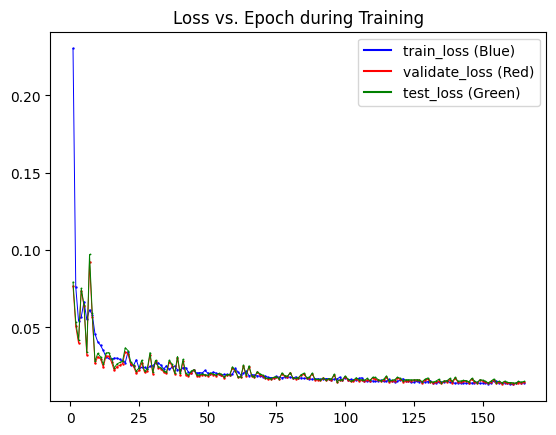

Epoch 165, train loss(MAE)=0.0144, valid loss(MAE)=0.0144, test loss(MAE)=0.0151, lr=0.01, best_test=0.014
Epoch 166, train loss(MAE)=0.0142, valid loss(MAE)=0.0156, test loss(MAE)=0.0162, lr=0.01, best_test=0.014
Epoch 167, train loss(MAE)=0.0135, valid loss(MAE)=0.0137, test loss(MAE)=0.0139, lr=0.01, best_test=0.0139
Epoch 168, train loss(MAE)=0.0133, valid loss(MAE)=0.015, test loss(MAE)=0.0156, lr=0.01, best_test=0.0139
Epoch 169, train loss(MAE)=0.0137, valid loss(MAE)=0.0138, test loss(MAE)=0.0139, lr=0.01, best_test=0.0139
Epoch 170, train loss(MAE)=0.0141, valid loss(MAE)=0.0138, test loss(MAE)=0.0139, lr=0.01, best_test=0.0139
Epoch 171, train loss(MAE)=0.0135, valid loss(MAE)=0.015, test loss(MAE)=0.0154, lr=0.01, best_test=0.0139
Epoch 172, train loss(MAE)=0.0138, valid loss(MAE)=0.0139, test loss(MAE)=0.014, lr=0.01, best_test=0.0139
Epoch 173, train loss(MAE)=0.0136, valid loss(MAE)=0.0147, test loss(MAE)=0.015, lr=0.01, best_test=0.0139
Epoch 174, train loss(MAE)=0.0137,

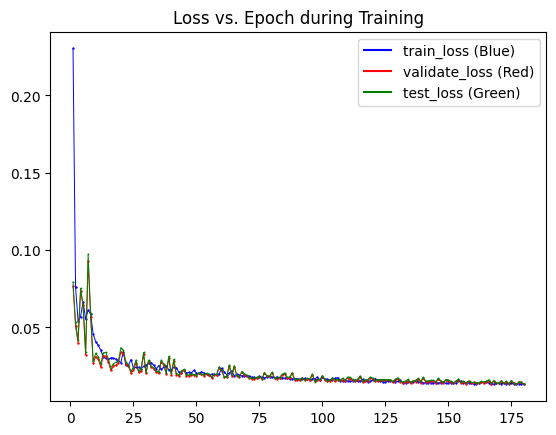

Epoch 180, train loss(MAE)=0.0135, valid loss(MAE)=0.0132, test loss(MAE)=0.0134, lr=0.01, best_test=0.0131
Epoch 181, train loss(MAE)=0.0129, valid loss(MAE)=0.0136, test loss(MAE)=0.0138, lr=0.01, best_test=0.0131
Epoch 182, train loss(MAE)=0.0129, valid loss(MAE)=0.0137, test loss(MAE)=0.0137, lr=0.01, best_test=0.0131
Epoch 183, train loss(MAE)=0.0139, valid loss(MAE)=0.0142, test loss(MAE)=0.0142, lr=0.01, best_test=0.0131
Epoch 184, train loss(MAE)=0.0139, valid loss(MAE)=0.0154, test loss(MAE)=0.0157, lr=0.01, best_test=0.0131
Epoch 185, train loss(MAE)=0.0131, valid loss(MAE)=0.0139, test loss(MAE)=0.0143, lr=0.01, best_test=0.0131
Epoch 186, train loss(MAE)=0.0132, valid loss(MAE)=0.013, test loss(MAE)=0.0135, lr=0.01, best_test=0.0131
Epoch 187, train loss(MAE)=0.0138, valid loss(MAE)=0.0137, test loss(MAE)=0.0142, lr=0.01, best_test=0.0131
Epoch 188, train loss(MAE)=0.0133, valid loss(MAE)=0.0141, test loss(MAE)=0.0142, lr=0.01, best_test=0.0131
Epoch 189, train loss(MAE)=0.

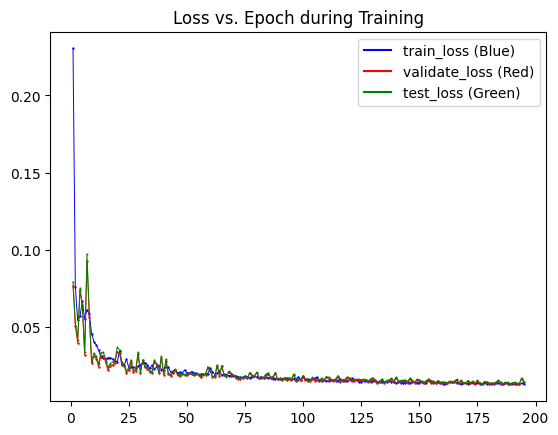

Epoch 195, train loss(MAE)=0.0135, valid loss(MAE)=0.0143, test loss(MAE)=0.0146, lr=0.01, best_test=0.0131
Epoch 196, train loss(MAE)=0.013, valid loss(MAE)=0.014, test loss(MAE)=0.0143, lr=0.01, best_test=0.0131
Epoch 197, train loss(MAE)=0.013, valid loss(MAE)=0.0149, test loss(MAE)=0.0152, lr=0.01, best_test=0.0131
Epoch 198, train loss(MAE)=0.0136, valid loss(MAE)=0.0134, test loss(MAE)=0.0137, lr=0.01, best_test=0.0131
Epoch 199, train loss(MAE)=0.0138, valid loss(MAE)=0.0148, test loss(MAE)=0.0146, lr=0.01, best_test=0.0131
Epoch 200, train loss(MAE)=0.0132, valid loss(MAE)=0.0143, test loss(MAE)=0.0143, lr=0.01, best_test=0.0131
Epoch 201, train loss(MAE)=0.0128, valid loss(MAE)=0.0135, test loss(MAE)=0.0137, lr=0.01, best_test=0.0131
Epoch 202, train loss(MAE)=0.013, valid loss(MAE)=0.0136, test loss(MAE)=0.0138, lr=0.01, best_test=0.0131
Epoch 203, train loss(MAE)=0.0127, valid loss(MAE)=0.0136, test loss(MAE)=0.0136, lr=0.01, best_test=0.0131
Epoch 204, train loss(MAE)=0.012

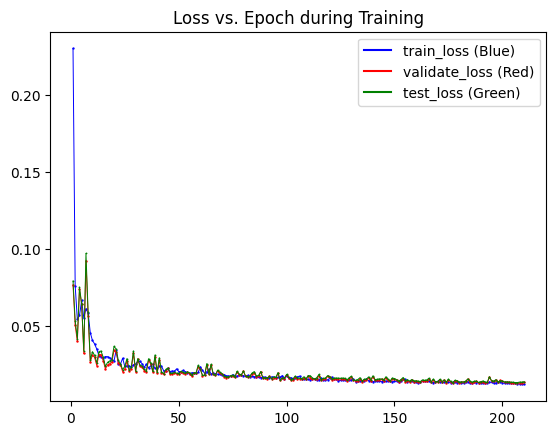

Epoch 210, train loss(MAE)=0.0121, valid loss(MAE)=0.0135, test loss(MAE)=0.0138, lr=0.008, best_test=0.0131
Epoch 211, train loss(MAE)=0.0123, valid loss(MAE)=0.0128, test loss(MAE)=0.0135, lr=0.008, best_test=0.0131
Epoch 212, train loss(MAE)=0.0119, valid loss(MAE)=0.0126, test loss(MAE)=0.013, lr=0.008, best_test=0.013
Epoch 213, train loss(MAE)=0.0119, valid loss(MAE)=0.0131, test loss(MAE)=0.0132, lr=0.008, best_test=0.013
Epoch 214, train loss(MAE)=0.0123, valid loss(MAE)=0.0132, test loss(MAE)=0.0136, lr=0.008, best_test=0.013
Epoch 215, train loss(MAE)=0.0124, valid loss(MAE)=0.0123, test loss(MAE)=0.0127, lr=0.008, best_test=0.0127
Epoch 216, train loss(MAE)=0.0118, valid loss(MAE)=0.013, test loss(MAE)=0.0135, lr=0.008, best_test=0.0127
Epoch 217, train loss(MAE)=0.0124, valid loss(MAE)=0.0126, test loss(MAE)=0.0127, lr=0.008, best_test=0.0127
Epoch 218, train loss(MAE)=0.0122, valid loss(MAE)=0.0131, test loss(MAE)=0.0137, lr=0.008, best_test=0.0127
Epoch 219, train loss(MA

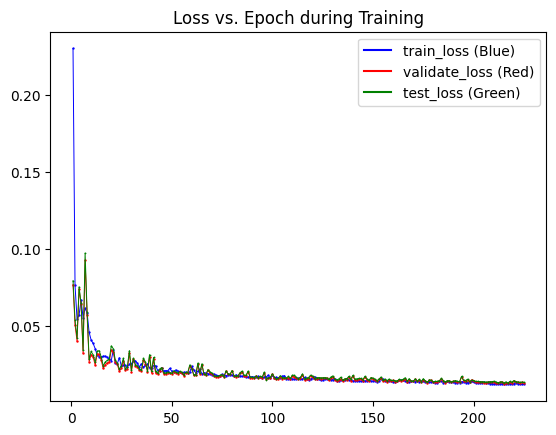

Epoch 225, train loss(MAE)=0.0119, valid loss(MAE)=0.0128, test loss(MAE)=0.0132, lr=0.008, best_test=0.0127
Epoch 226, train loss(MAE)=0.0125, valid loss(MAE)=0.0127, test loss(MAE)=0.0127, lr=0.008, best_test=0.0127
Epoch 227, train loss(MAE)=0.0118, valid loss(MAE)=0.0125, test loss(MAE)=0.0126, lr=0.008, best_test=0.0126
Epoch 228, train loss(MAE)=0.0119, valid loss(MAE)=0.0126, test loss(MAE)=0.0125, lr=0.008, best_test=0.0125
Epoch 229, train loss(MAE)=0.0123, valid loss(MAE)=0.0126, test loss(MAE)=0.0127, lr=0.008, best_test=0.0125
Epoch 230, train loss(MAE)=0.0117, valid loss(MAE)=0.0136, test loss(MAE)=0.0135, lr=0.008, best_test=0.0125
Epoch 231, train loss(MAE)=0.012, valid loss(MAE)=0.0132, test loss(MAE)=0.0133, lr=0.008, best_test=0.0125
Epoch 232, train loss(MAE)=0.0122, valid loss(MAE)=0.0127, test loss(MAE)=0.0129, lr=0.008, best_test=0.0125
Epoch 233, train loss(MAE)=0.0121, valid loss(MAE)=0.0128, test loss(MAE)=0.0131, lr=0.008, best_test=0.0125
Epoch 234, train los

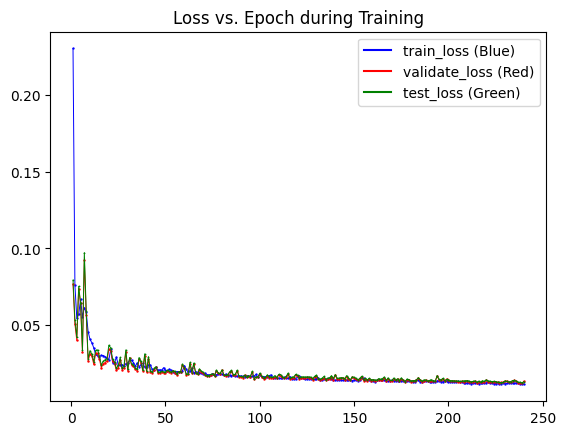

Epoch 240, train loss(MAE)=0.0114, valid loss(MAE)=0.0132, test loss(MAE)=0.0132, lr=0.0064, best_test=0.0123
Epoch 241, train loss(MAE)=0.0116, valid loss(MAE)=0.0137, test loss(MAE)=0.0141, lr=0.0064, best_test=0.0123
Epoch 242, train loss(MAE)=0.0117, valid loss(MAE)=0.013, test loss(MAE)=0.0132, lr=0.0064, best_test=0.0123
Epoch 243, train loss(MAE)=0.0119, valid loss(MAE)=0.0125, test loss(MAE)=0.0128, lr=0.0064, best_test=0.0123
Epoch 244, train loss(MAE)=0.0112, valid loss(MAE)=0.0119, test loss(MAE)=0.0121, lr=0.0064, best_test=0.0121
Epoch 245, train loss(MAE)=0.0115, valid loss(MAE)=0.0129, test loss(MAE)=0.0132, lr=0.0064, best_test=0.0121
Epoch 246, train loss(MAE)=0.0114, valid loss(MAE)=0.013, test loss(MAE)=0.0132, lr=0.0064, best_test=0.0121
Epoch 247, train loss(MAE)=0.0116, valid loss(MAE)=0.0128, test loss(MAE)=0.0132, lr=0.0064, best_test=0.0121
Epoch 248, train loss(MAE)=0.0118, valid loss(MAE)=0.0127, test loss(MAE)=0.0127, lr=0.0064, best_test=0.0121
Epoch 249, t

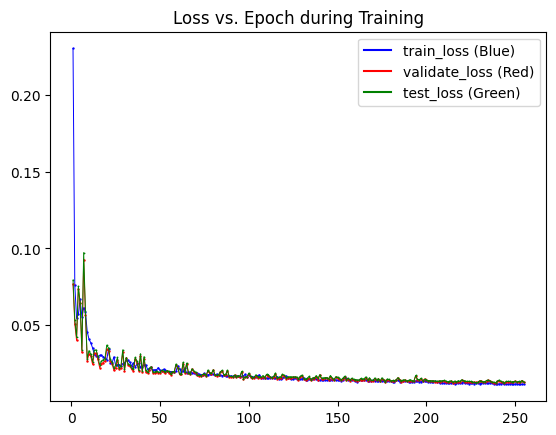

Epoch 255, train loss(MAE)=0.0114, valid loss(MAE)=0.0126, test loss(MAE)=0.0127, lr=0.0064, best_test=0.0121
Epoch 256, train loss(MAE)=0.0114, valid loss(MAE)=0.0128, test loss(MAE)=0.0129, lr=0.0064, best_test=0.0121
Epoch 257, train loss(MAE)=0.0116, valid loss(MAE)=0.0126, test loss(MAE)=0.0123, lr=0.0064, best_test=0.0121
Epoch 258, train loss(MAE)=0.0113, valid loss(MAE)=0.0139, test loss(MAE)=0.0139, lr=0.0064, best_test=0.0121
Epoch 259, train loss(MAE)=0.0112, valid loss(MAE)=0.0126, test loss(MAE)=0.0127, lr=0.0064, best_test=0.0121
Epoch 260, train loss(MAE)=0.012, valid loss(MAE)=0.0127, test loss(MAE)=0.0128, lr=0.0064, best_test=0.0121
Epoch 261, train loss(MAE)=0.0112, valid loss(MAE)=0.0129, test loss(MAE)=0.0128, lr=0.0064, best_test=0.0121
Epoch 262, train loss(MAE)=0.0113, valid loss(MAE)=0.012, test loss(MAE)=0.0123, lr=0.0064, best_test=0.0121
Epoch 263, train loss(MAE)=0.0112, valid loss(MAE)=0.0126, test loss(MAE)=0.0128, lr=0.0064, best_test=0.0121
Epoch 264, t

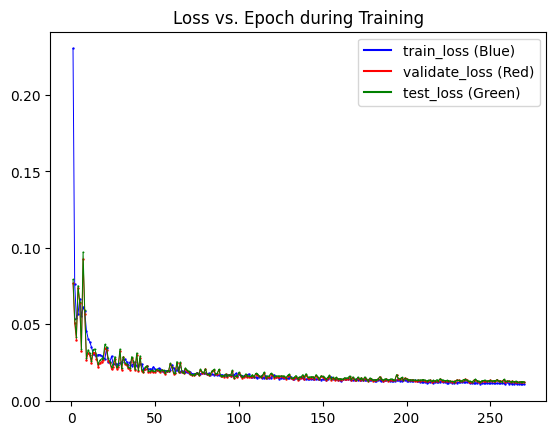

Epoch 270, train loss(MAE)=0.0109, valid loss(MAE)=0.0121, test loss(MAE)=0.0124, lr=0.00512, best_test=0.012
Epoch 271, train loss(MAE)=0.011, valid loss(MAE)=0.0122, test loss(MAE)=0.0123, lr=0.00512, best_test=0.012
Epoch 272, train loss(MAE)=0.0108, valid loss(MAE)=0.0122, test loss(MAE)=0.0121, lr=0.00512, best_test=0.012
Epoch 273, train loss(MAE)=0.0111, valid loss(MAE)=0.0134, test loss(MAE)=0.0137, lr=0.00512, best_test=0.012
Epoch 274, train loss(MAE)=0.0107, valid loss(MAE)=0.0125, test loss(MAE)=0.0124, lr=0.00512, best_test=0.012
Epoch 275, train loss(MAE)=0.0109, valid loss(MAE)=0.0119, test loss(MAE)=0.012, lr=0.00512, best_test=0.012
Epoch 276, train loss(MAE)=0.0108, valid loss(MAE)=0.0118, test loss(MAE)=0.0118, lr=0.00512, best_test=0.0118
Epoch 277, train loss(MAE)=0.0106, valid loss(MAE)=0.0116, test loss(MAE)=0.0118, lr=0.00512, best_test=0.0118
Epoch 278, train loss(MAE)=0.0107, valid loss(MAE)=0.0126, test loss(MAE)=0.0127, lr=0.00512, best_test=0.0118
Epoch 279

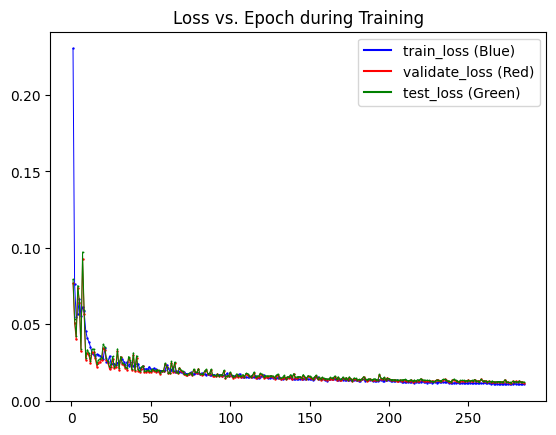

Epoch 285, train loss(MAE)=0.0106, valid loss(MAE)=0.0118, test loss(MAE)=0.0121, lr=0.00512, best_test=0.0118
Epoch 286, train loss(MAE)=0.0108, valid loss(MAE)=0.0121, test loss(MAE)=0.0124, lr=0.00512, best_test=0.0118
Epoch 287, train loss(MAE)=0.0109, valid loss(MAE)=0.0122, test loss(MAE)=0.0124, lr=0.00512, best_test=0.0118
Epoch 288, train loss(MAE)=0.0112, valid loss(MAE)=0.0129, test loss(MAE)=0.013, lr=0.00512, best_test=0.0118
Epoch 289, train loss(MAE)=0.0114, valid loss(MAE)=0.0122, test loss(MAE)=0.0123, lr=0.00512, best_test=0.0118
Epoch 290, train loss(MAE)=0.0108, valid loss(MAE)=0.0125, test loss(MAE)=0.0126, lr=0.00512, best_test=0.0118
Epoch 291, train loss(MAE)=0.0107, valid loss(MAE)=0.0126, test loss(MAE)=0.0126, lr=0.00512, best_test=0.0118
Epoch 292, train loss(MAE)=0.0109, valid loss(MAE)=0.0131, test loss(MAE)=0.013, lr=0.00512, best_test=0.0118
Epoch 293, train loss(MAE)=0.0107, valid loss(MAE)=0.0126, test loss(MAE)=0.0125, lr=0.00512, best_test=0.0118
Epo

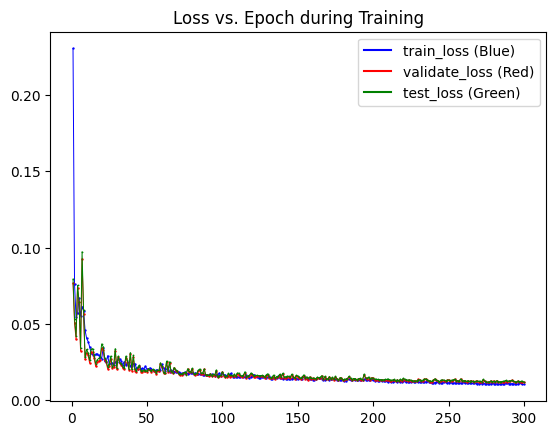

Epoch 300, train loss(MAE)=0.0103, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.004096, best_test=0.0117
Epoch 301, train loss(MAE)=0.0104, valid loss(MAE)=0.0118, test loss(MAE)=0.0115, lr=0.004096, best_test=0.0115
Epoch 302, train loss(MAE)=0.0103, valid loss(MAE)=0.0128, test loss(MAE)=0.0129, lr=0.004096, best_test=0.0115
Epoch 303, train loss(MAE)=0.0108, valid loss(MAE)=0.0115, test loss(MAE)=0.0115, lr=0.004096, best_test=0.0115
Epoch 304, train loss(MAE)=0.0103, valid loss(MAE)=0.0117, test loss(MAE)=0.0118, lr=0.004096, best_test=0.0115
Epoch 305, train loss(MAE)=0.0103, valid loss(MAE)=0.0121, test loss(MAE)=0.0123, lr=0.004096, best_test=0.0115
Epoch 306, train loss(MAE)=0.0102, valid loss(MAE)=0.012, test loss(MAE)=0.0121, lr=0.004096, best_test=0.0115
Epoch 307, train loss(MAE)=0.0106, valid loss(MAE)=0.0119, test loss(MAE)=0.0118, lr=0.004096, best_test=0.0115
Epoch 308, train loss(MAE)=0.0104, valid loss(MAE)=0.0128, test loss(MAE)=0.0126, lr=0.004096, best_test=

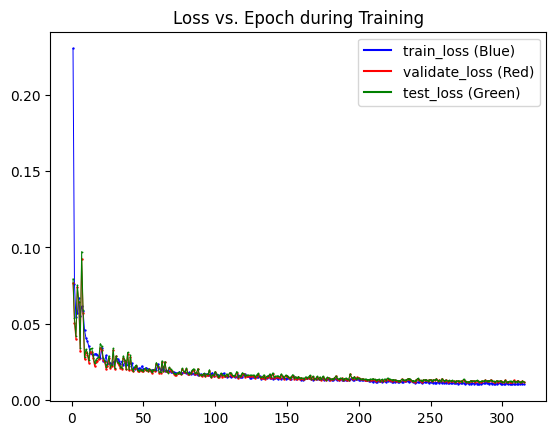

Epoch 315, train loss(MAE)=0.0101, valid loss(MAE)=0.0118, test loss(MAE)=0.0118, lr=0.004096, best_test=0.0115
Epoch 316, train loss(MAE)=0.0102, valid loss(MAE)=0.012, test loss(MAE)=0.0116, lr=0.004096, best_test=0.0115
Epoch 317, train loss(MAE)=0.01, valid loss(MAE)=0.0125, test loss(MAE)=0.0123, lr=0.004096, best_test=0.0115
Epoch 318, train loss(MAE)=0.0101, valid loss(MAE)=0.0115, test loss(MAE)=0.0118, lr=0.004096, best_test=0.0115
Epoch 319, train loss(MAE)=0.0102, valid loss(MAE)=0.0116, test loss(MAE)=0.0117, lr=0.004096, best_test=0.0115
Epoch 320, train loss(MAE)=0.0104, valid loss(MAE)=0.0116, test loss(MAE)=0.0119, lr=0.004096, best_test=0.0115
Epoch 321, train loss(MAE)=0.0104, valid loss(MAE)=0.0126, test loss(MAE)=0.0127, lr=0.004096, best_test=0.0115
Epoch 322, train loss(MAE)=0.0101, valid loss(MAE)=0.0129, test loss(MAE)=0.0128, lr=0.004096, best_test=0.0115
Epoch 323, train loss(MAE)=0.0105, valid loss(MAE)=0.0117, test loss(MAE)=0.0119, lr=0.004096, best_test=0.

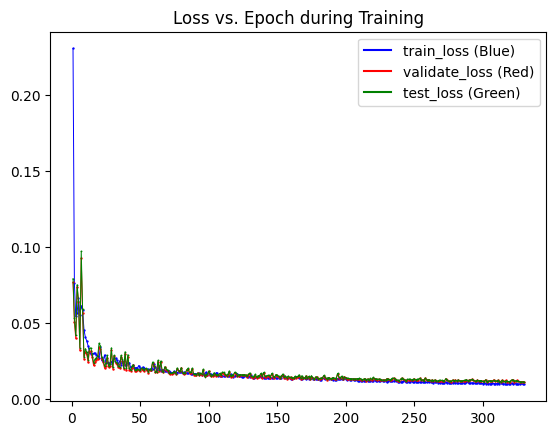

Epoch 330, train loss(MAE)=0.0098, valid loss(MAE)=0.0114, test loss(MAE)=0.0115, lr=0.0032768, best_test=0.0114
Epoch 331, train loss(MAE)=0.0098, valid loss(MAE)=0.0115, test loss(MAE)=0.0117, lr=0.0032768, best_test=0.0114
Epoch 332, train loss(MAE)=0.0097, valid loss(MAE)=0.0116, test loss(MAE)=0.0116, lr=0.0032768, best_test=0.0114
Epoch 333, train loss(MAE)=0.0098, valid loss(MAE)=0.0118, test loss(MAE)=0.0117, lr=0.0032768, best_test=0.0114
Epoch 334, train loss(MAE)=0.01, valid loss(MAE)=0.0122, test loss(MAE)=0.012, lr=0.0032768, best_test=0.0114
Epoch 335, train loss(MAE)=0.0107, valid loss(MAE)=0.0123, test loss(MAE)=0.0124, lr=0.0032768, best_test=0.0114
Epoch 336, train loss(MAE)=0.0101, valid loss(MAE)=0.0119, test loss(MAE)=0.0118, lr=0.0032768, best_test=0.0114
Epoch 337, train loss(MAE)=0.0099, valid loss(MAE)=0.0123, test loss(MAE)=0.0121, lr=0.0032768, best_test=0.0114
Epoch 338, train loss(MAE)=0.01, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.0032768, best_

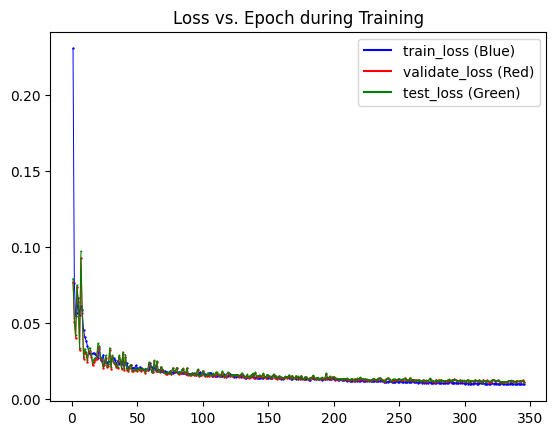

Epoch 345, train loss(MAE)=0.0097, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.0032768, best_test=0.0114
Epoch 346, train loss(MAE)=0.01, valid loss(MAE)=0.0123, test loss(MAE)=0.0123, lr=0.0032768, best_test=0.0114
Epoch 347, train loss(MAE)=0.01, valid loss(MAE)=0.0117, test loss(MAE)=0.0118, lr=0.0032768, best_test=0.0114
Epoch 348, train loss(MAE)=0.0098, valid loss(MAE)=0.0122, test loss(MAE)=0.012, lr=0.0032768, best_test=0.0114
Epoch 349, train loss(MAE)=0.0098, valid loss(MAE)=0.012, test loss(MAE)=0.012, lr=0.0032768, best_test=0.0114
Epoch 350, train loss(MAE)=0.0098, valid loss(MAE)=0.0122, test loss(MAE)=0.0122, lr=0.0032768, best_test=0.0114
Epoch 351, train loss(MAE)=0.0098, valid loss(MAE)=0.0114, test loss(MAE)=0.0115, lr=0.0032768, best_test=0.0114
Epoch 352, train loss(MAE)=0.0098, valid loss(MAE)=0.0114, test loss(MAE)=0.0115, lr=0.0032768, best_test=0.0114
Epoch 353, train loss(MAE)=0.0099, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.0032768, best_te

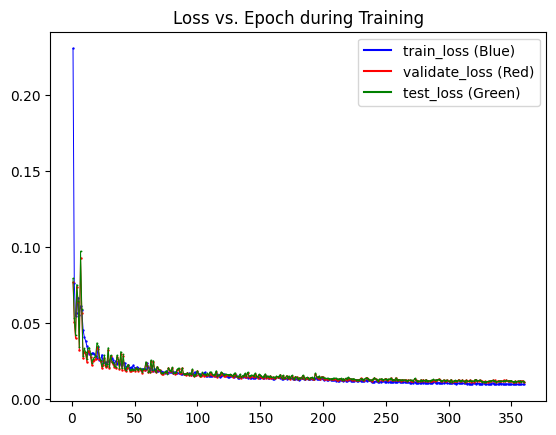

Epoch 360, train loss(MAE)=0.0098, valid loss(MAE)=0.0114, test loss(MAE)=0.0115, lr=0.00262144, best_test=0.0114
Epoch 361, train loss(MAE)=0.0096, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00262144, best_test=0.0114
Epoch 362, train loss(MAE)=0.0094, valid loss(MAE)=0.0117, test loss(MAE)=0.0115, lr=0.00262144, best_test=0.0114
Epoch 363, train loss(MAE)=0.0094, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.00262144, best_test=0.0114
Epoch 364, train loss(MAE)=0.0096, valid loss(MAE)=0.0115, test loss(MAE)=0.0115, lr=0.00262144, best_test=0.0114
Epoch 365, train loss(MAE)=0.0095, valid loss(MAE)=0.0117, test loss(MAE)=0.0118, lr=0.00262144, best_test=0.0114
Epoch 366, train loss(MAE)=0.0095, valid loss(MAE)=0.0115, test loss(MAE)=0.0117, lr=0.00262144, best_test=0.0114
Epoch 367, train loss(MAE)=0.0097, valid loss(MAE)=0.0125, test loss(MAE)=0.0123, lr=0.00262144, best_test=0.0114
Epoch 368, train loss(MAE)=0.0096, valid loss(MAE)=0.0115, test loss(MAE)=0.0113, lr=0.0

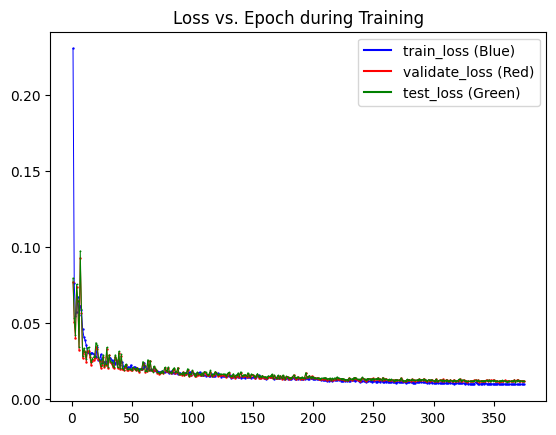

Epoch 375, train loss(MAE)=0.0095, valid loss(MAE)=0.0118, test loss(MAE)=0.0116, lr=0.00262144, best_test=0.0113
Epoch 376, train loss(MAE)=0.0095, valid loss(MAE)=0.0118, test loss(MAE)=0.0118, lr=0.00262144, best_test=0.0113
Epoch 377, train loss(MAE)=0.0099, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00262144, best_test=0.0113
Epoch 378, train loss(MAE)=0.0095, valid loss(MAE)=0.012, test loss(MAE)=0.0119, lr=0.00262144, best_test=0.0113
Epoch 379, train loss(MAE)=0.0096, valid loss(MAE)=0.0116, test loss(MAE)=0.0114, lr=0.00262144, best_test=0.0113
Epoch 380, train loss(MAE)=0.0096, valid loss(MAE)=0.0117, test loss(MAE)=0.0115, lr=0.00209715, best_test=0.0113
Epoch 381, train loss(MAE)=0.0097, valid loss(MAE)=0.0116, test loss(MAE)=0.0117, lr=0.00209715, best_test=0.0113
Epoch 382, train loss(MAE)=0.0096, valid loss(MAE)=0.0116, test loss(MAE)=0.0116, lr=0.00209715, best_test=0.0113
Epoch 383, train loss(MAE)=0.0094, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.00

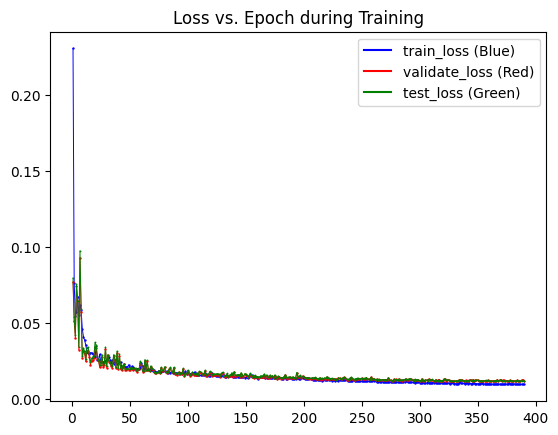

Epoch 390, train loss(MAE)=0.0095, valid loss(MAE)=0.0115, test loss(MAE)=0.0113, lr=0.00209715, best_test=0.0113
Epoch 391, train loss(MAE)=0.0093, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00209715, best_test=0.0113
Epoch 392, train loss(MAE)=0.0093, valid loss(MAE)=0.0116, test loss(MAE)=0.0114, lr=0.00209715, best_test=0.0113
Epoch 393, train loss(MAE)=0.0093, valid loss(MAE)=0.0118, test loss(MAE)=0.0117, lr=0.00209715, best_test=0.0113
Epoch 394, train loss(MAE)=0.0094, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.00209715, best_test=0.0113
Epoch 395, train loss(MAE)=0.0092, valid loss(MAE)=0.0117, test loss(MAE)=0.0116, lr=0.00209715, best_test=0.0113
Epoch 396, train loss(MAE)=0.009, valid loss(MAE)=0.0118, test loss(MAE)=0.0118, lr=0.00209715, best_test=0.0113
Epoch 397, train loss(MAE)=0.0092, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.00209715, best_test=0.0113
Epoch 398, train loss(MAE)=0.0093, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00

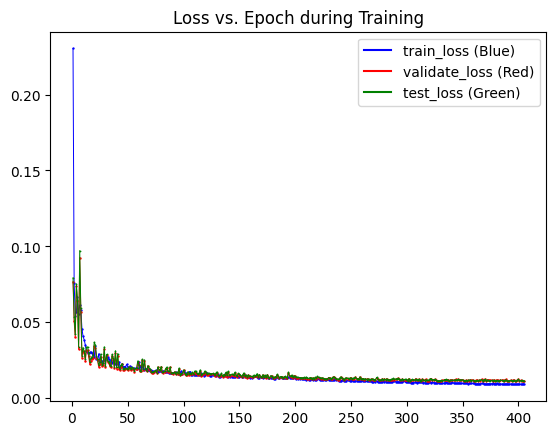

Epoch 405, train loss(MAE)=0.0096, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00209715, best_test=0.0112
Epoch 406, train loss(MAE)=0.0093, valid loss(MAE)=0.0114, test loss(MAE)=0.0112, lr=0.00209715, best_test=0.0112
Epoch 407, train loss(MAE)=0.0092, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00209715, best_test=0.0112
Epoch 408, train loss(MAE)=0.0092, valid loss(MAE)=0.0115, test loss(MAE)=0.0112, lr=0.00209715, best_test=0.0112
Epoch 409, train loss(MAE)=0.0091, valid loss(MAE)=0.0117, test loss(MAE)=0.0118, lr=0.00209715, best_test=0.0112
Epoch 410, train loss(MAE)=0.009, valid loss(MAE)=0.0116, test loss(MAE)=0.0116, lr=0.00209715, best_test=0.0112
Epoch 411, train loss(MAE)=0.0092, valid loss(MAE)=0.0117, test loss(MAE)=0.0116, lr=0.00209715, best_test=0.0112
Epoch 412, train loss(MAE)=0.0091, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00209715, best_test=0.0112
Epoch 413, train loss(MAE)=0.0094, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.00

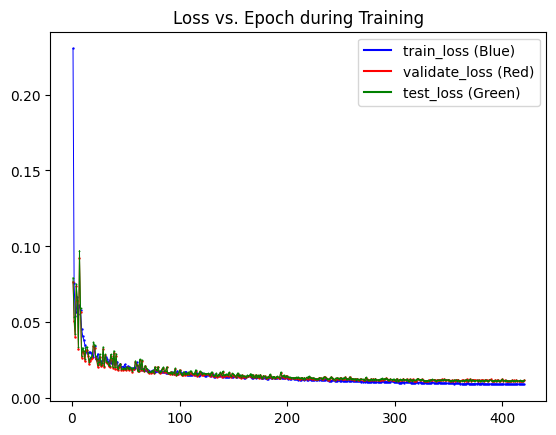

Epoch 420, train loss(MAE)=0.009, valid loss(MAE)=0.0117, test loss(MAE)=0.0117, lr=0.00167772, best_test=0.0112
Epoch 421, train loss(MAE)=0.0092, valid loss(MAE)=0.0116, test loss(MAE)=0.0115, lr=0.00167772, best_test=0.0112
Epoch 422, train loss(MAE)=0.009, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 423, train loss(MAE)=0.009, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00167772, best_test=0.0112
Epoch 424, train loss(MAE)=0.0089, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00167772, best_test=0.0112
Epoch 425, train loss(MAE)=0.0089, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00167772, best_test=0.0112
Epoch 426, train loss(MAE)=0.009, valid loss(MAE)=0.0116, test loss(MAE)=0.0116, lr=0.00167772, best_test=0.0112
Epoch 427, train loss(MAE)=0.009, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00167772, best_test=0.0112
Epoch 428, train loss(MAE)=0.0092, valid loss(MAE)=0.0116, test loss(MAE)=0.0115, lr=0.001677

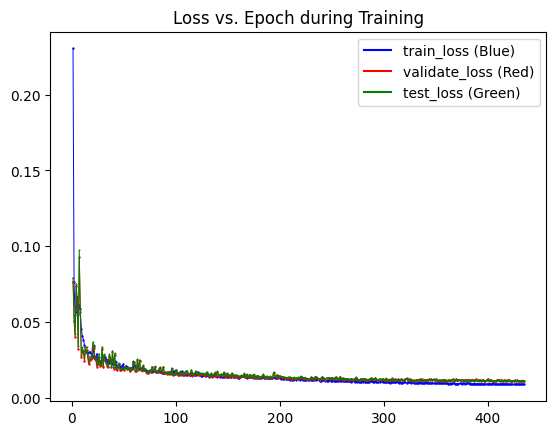

Epoch 435, train loss(MAE)=0.009, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 436, train loss(MAE)=0.0089, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 437, train loss(MAE)=0.0088, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 438, train loss(MAE)=0.0089, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00167772, best_test=0.0112
Epoch 439, train loss(MAE)=0.0089, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 440, train loss(MAE)=0.0089, valid loss(MAE)=0.0114, test loss(MAE)=0.0117, lr=0.00167772, best_test=0.0112
Epoch 441, train loss(MAE)=0.0089, valid loss(MAE)=0.0112, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 442, train loss(MAE)=0.009, valid loss(MAE)=0.0118, test loss(MAE)=0.0121, lr=0.00167772, best_test=0.0112
Epoch 443, train loss(MAE)=0.0091, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.001

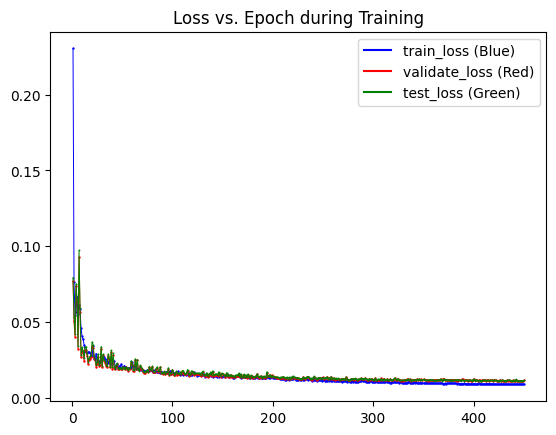

Epoch 450, train loss(MAE)=0.0089, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 451, train loss(MAE)=0.0089, valid loss(MAE)=0.0115, test loss(MAE)=0.0113, lr=0.00167772, best_test=0.0112
Epoch 452, train loss(MAE)=0.0088, valid loss(MAE)=0.0116, test loss(MAE)=0.0115, lr=0.00167772, best_test=0.0112
Epoch 453, train loss(MAE)=0.009, valid loss(MAE)=0.0115, test loss(MAE)=0.0115, lr=0.00167772, best_test=0.0112
Epoch 454, train loss(MAE)=0.0091, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00167772, best_test=0.0112
Epoch 455, train loss(MAE)=0.0088, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 456, train loss(MAE)=0.0088, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00167772, best_test=0.0112
Epoch 457, train loss(MAE)=0.0089, valid loss(MAE)=0.0114, test loss(MAE)=0.0117, lr=0.00167772, best_test=0.0112
Epoch 458, train loss(MAE)=0.0089, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00

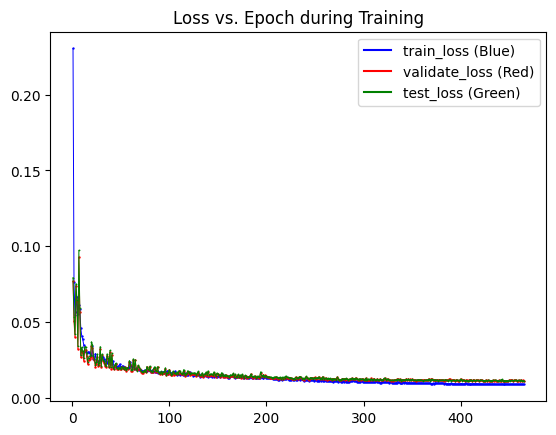

Epoch 465, train loss(MAE)=0.0089, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00134218, best_test=0.0112
Epoch 466, train loss(MAE)=0.0087, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00134218, best_test=0.0112
Epoch 467, train loss(MAE)=0.0089, valid loss(MAE)=0.0116, test loss(MAE)=0.0114, lr=0.00134218, best_test=0.0112
Epoch 468, train loss(MAE)=0.0088, valid loss(MAE)=0.0115, test loss(MAE)=0.0114, lr=0.00134218, best_test=0.0112
Epoch 469, train loss(MAE)=0.0088, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.00134218, best_test=0.0111
Epoch 470, train loss(MAE)=0.0088, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00134218, best_test=0.0111
Epoch 471, train loss(MAE)=0.0086, valid loss(MAE)=0.0114, test loss(MAE)=0.0113, lr=0.00134218, best_test=0.0111
Epoch 472, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00134218, best_test=0.0111
Epoch 473, train loss(MAE)=0.0087, valid loss(MAE)=0.0114, test loss(MAE)=0.0112, lr=0.0

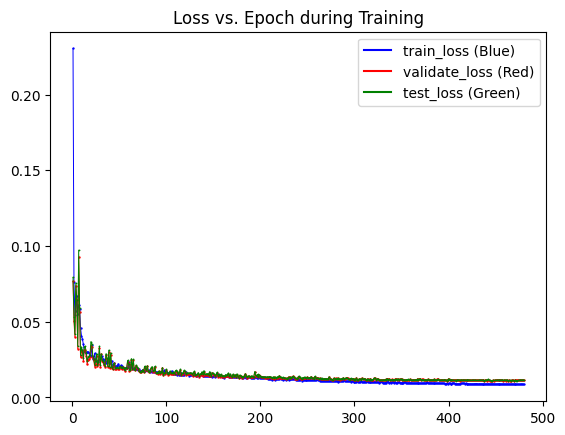

Epoch 480, train loss(MAE)=0.0087, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.00107374, best_test=0.0111
Epoch 481, train loss(MAE)=0.0085, valid loss(MAE)=0.0114, test loss(MAE)=0.0113, lr=0.00107374, best_test=0.0111
Epoch 482, train loss(MAE)=0.0085, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.00107374, best_test=0.0111
Epoch 483, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.0111
Epoch 484, train loss(MAE)=0.0086, valid loss(MAE)=0.0114, test loss(MAE)=0.0113, lr=0.00107374, best_test=0.0111
Epoch 485, train loss(MAE)=0.0085, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.00107374, best_test=0.0111
Epoch 486, train loss(MAE)=0.0085, valid loss(MAE)=0.0114, test loss(MAE)=0.0111, lr=0.00107374, best_test=0.0111
Epoch 487, train loss(MAE)=0.0086, valid loss(MAE)=0.0118, test loss(MAE)=0.0116, lr=0.00107374, best_test=0.0111
Epoch 488, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.0

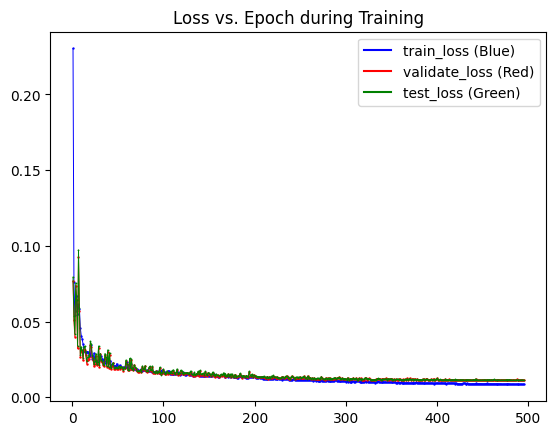

Epoch 495, train loss(MAE)=0.0087, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.0111
Epoch 496, train loss(MAE)=0.0086, valid loss(MAE)=0.011, test loss(MAE)=0.011, lr=0.00107374, best_test=0.011
Epoch 497, train loss(MAE)=0.0086, valid loss(MAE)=0.0113, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 498, train loss(MAE)=0.0087, valid loss(MAE)=0.0112, test loss(MAE)=0.011, lr=0.00107374, best_test=0.011
Epoch 499, train loss(MAE)=0.0085, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00107374, best_test=0.011
Epoch 500, train loss(MAE)=0.0085, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 501, train loss(MAE)=0.0086, valid loss(MAE)=0.0114, test loss(MAE)=0.0115, lr=0.00107374, best_test=0.011
Epoch 502, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.00107374, best_test=0.011
Epoch 503, train loss(MAE)=0.0085, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00107374, be

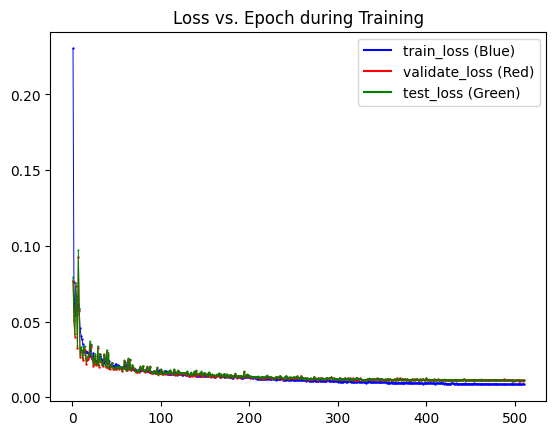

Epoch 510, train loss(MAE)=0.0085, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 511, train loss(MAE)=0.0085, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 512, train loss(MAE)=0.0086, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 513, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 514, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00107374, best_test=0.011
Epoch 515, train loss(MAE)=0.0085, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00107374, best_test=0.011
Epoch 516, train loss(MAE)=0.0085, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00107374, best_test=0.011
Epoch 517, train loss(MAE)=0.0084, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00107374, best_test=0.011
Epoch 518, train loss(MAE)=0.0085, valid loss(MAE)=0.0113, test loss(MAE)=0.0112, lr=0.00107374, 

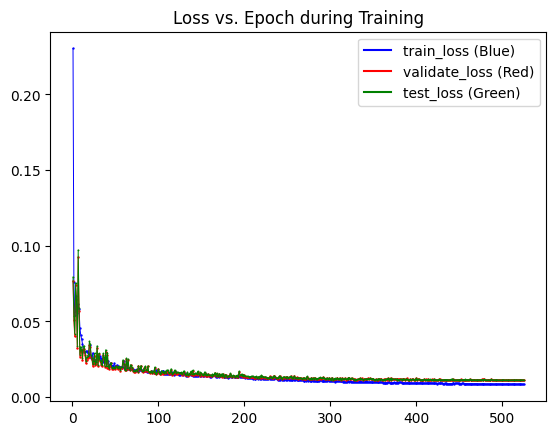

Epoch 525, train loss(MAE)=0.0084, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00085899, best_test=0.011
Epoch 526, train loss(MAE)=0.0084, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00085899, best_test=0.011
Epoch 527, train loss(MAE)=0.0083, valid loss(MAE)=0.0114, test loss(MAE)=0.0114, lr=0.00085899, best_test=0.011
Epoch 528, train loss(MAE)=0.0084, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00085899, best_test=0.011
Epoch 529, train loss(MAE)=0.0086, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.00085899, best_test=0.011
Epoch 530, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00085899, best_test=0.011
Epoch 531, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00085899, best_test=0.011
Epoch 532, train loss(MAE)=0.0085, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00085899, best_test=0.011
Epoch 533, train loss(MAE)=0.0084, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00085899, be

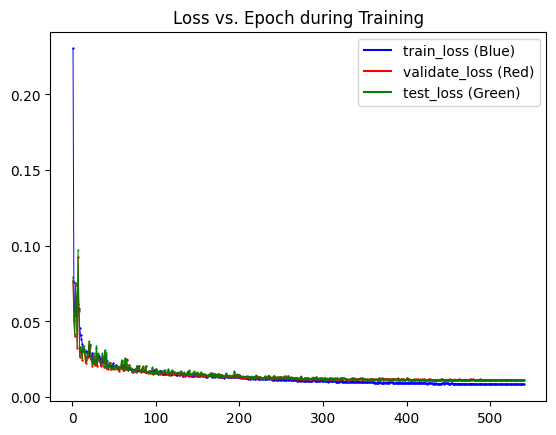

Epoch 540, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00085899, best_test=0.011
Epoch 541, train loss(MAE)=0.0086, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00085899, best_test=0.011
Epoch 542, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00085899, best_test=0.011
Epoch 543, train loss(MAE)=0.0082, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00085899, best_test=0.011
Epoch 544, train loss(MAE)=0.0085, valid loss(MAE)=0.0113, test loss(MAE)=0.0114, lr=0.00085899, best_test=0.011
Epoch 545, train loss(MAE)=0.0083, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00085899, best_test=0.011
Epoch 546, train loss(MAE)=0.0084, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00085899, best_test=0.011
Epoch 547, train loss(MAE)=0.0084, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00085899, best_test=0.011
Epoch 548, train loss(MAE)=0.0084, valid loss(MAE)=0.011, test loss(MAE)=0.0112, lr=0.00085899, be

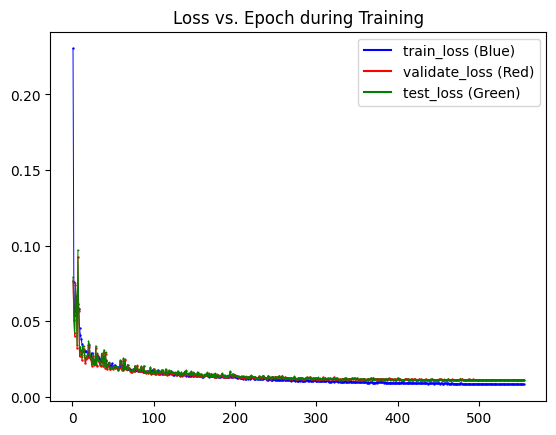

Epoch 555, train loss(MAE)=0.0082, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00068719, best_test=0.011
Epoch 556, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00068719, best_test=0.011
Epoch 557, train loss(MAE)=0.0085, valid loss(MAE)=0.0108, test loss(MAE)=0.0109, lr=0.00068719, best_test=0.0109
Epoch 558, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00068719, best_test=0.0109
Epoch 559, train loss(MAE)=0.0083, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00068719, best_test=0.0109
Epoch 560, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00068719, best_test=0.0109
Epoch 561, train loss(MAE)=0.0084, valid loss(MAE)=0.0114, test loss(MAE)=0.0113, lr=0.00068719, best_test=0.0109
Epoch 562, train loss(MAE)=0.0086, valid loss(MAE)=0.0112, test loss(MAE)=0.0111, lr=0.00068719, best_test=0.0109
Epoch 563, train loss(MAE)=0.0083, valid loss(MAE)=0.0111, test loss(MAE)=0.0111, lr=0.00068

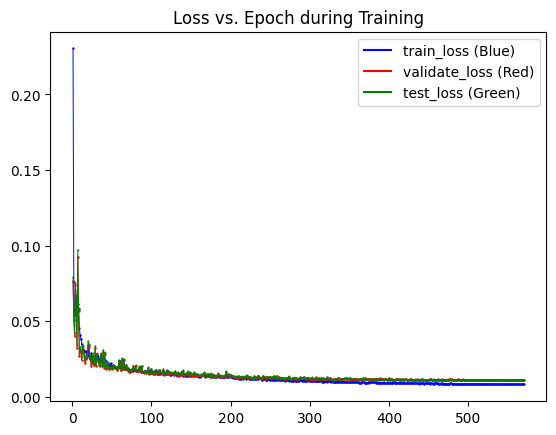

Epoch 570, train loss(MAE)=0.0082, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00068719, best_test=0.0109
Epoch 571, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00068719, best_test=0.0109
Epoch 572, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00068719, best_test=0.0109
Epoch 573, train loss(MAE)=0.0082, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00068719, best_test=0.0109
Epoch 574, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00068719, best_test=0.0109
Epoch 575, train loss(MAE)=0.0084, valid loss(MAE)=0.0111, test loss(MAE)=0.0111, lr=0.00068719, best_test=0.0109
Epoch 576, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00068719, best_test=0.0109
Epoch 577, train loss(MAE)=0.0082, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.00068719, best_test=0.0109
Epoch 578, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.000

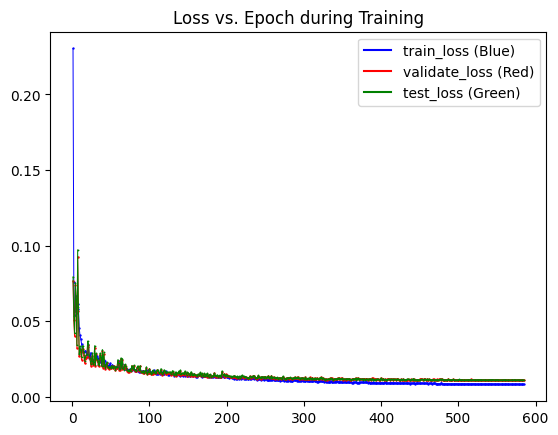

Epoch 585, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00054976, best_test=0.0109
Epoch 586, train loss(MAE)=0.0082, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00054976, best_test=0.0109
Epoch 587, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00054976, best_test=0.0109
Epoch 588, train loss(MAE)=0.0082, valid loss(MAE)=0.0112, test loss(MAE)=0.0113, lr=0.00054976, best_test=0.0109
Epoch 589, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00054976, best_test=0.0109
Epoch 590, train loss(MAE)=0.0083, valid loss(MAE)=0.0108, test loss(MAE)=0.0109, lr=0.00054976, best_test=0.0109
Epoch 591, train loss(MAE)=0.0083, valid loss(MAE)=0.0109, test loss(MAE)=0.011, lr=0.00054976, best_test=0.0109
Epoch 592, train loss(MAE)=0.0082, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00054976, best_test=0.0109
Epoch 593, train loss(MAE)=0.0084, valid loss(MAE)=0.0111, test loss(MAE)=0.0111, lr=0.0005

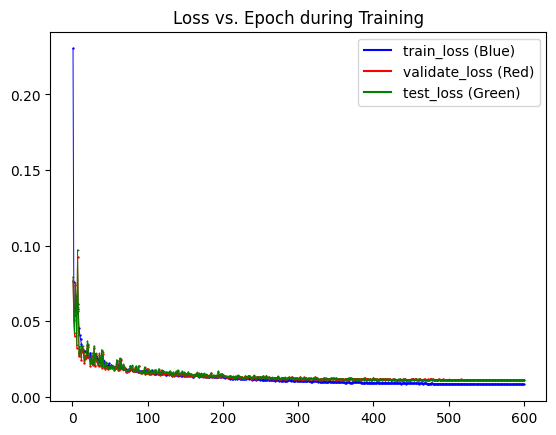

Epoch 600, train loss(MAE)=0.0082, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00054976, best_test=0.0109
Epoch 601, train loss(MAE)=0.0083, valid loss(MAE)=0.0114, test loss(MAE)=0.0113, lr=0.00054976, best_test=0.0109
Epoch 602, train loss(MAE)=0.0085, valid loss(MAE)=0.0111, test loss(MAE)=0.0111, lr=0.00054976, best_test=0.0109
Epoch 603, train loss(MAE)=0.0084, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00054976, best_test=0.0109
Epoch 604, train loss(MAE)=0.0082, valid loss(MAE)=0.0113, test loss(MAE)=0.0113, lr=0.00054976, best_test=0.0109
Epoch 605, train loss(MAE)=0.0083, valid loss(MAE)=0.0109, test loss(MAE)=0.011, lr=0.00054976, best_test=0.0109
Epoch 606, train loss(MAE)=0.0083, valid loss(MAE)=0.0112, test loss(MAE)=0.0112, lr=0.00054976, best_test=0.0109
Epoch 607, train loss(MAE)=0.0083, valid loss(MAE)=0.011, test loss(MAE)=0.0111, lr=0.00054976, best_test=0.0109
Epoch 608, train loss(MAE)=0.0081, valid loss(MAE)=0.0111, test loss(MAE)=0.0112, lr=0.000

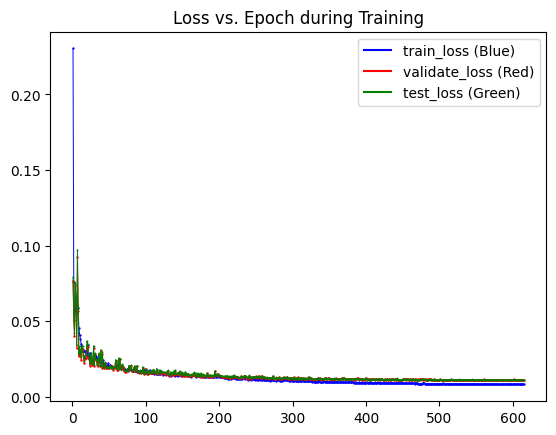

Epoch 615, train loss(MAE)=0.0081, valid loss(MAE)=0.0111, test loss(MAE)=0.0111, lr=0.0004398, best_test=0.0109
Epoch 616, train loss(MAE)=0.0081, valid loss(MAE)=0.011, test loss(MAE)=0.011, lr=0.0004398, best_test=0.0109


KeyboardInterrupt: 

In [5]:
epoch_start = 0 if epoch is None else epoch
epoch = epoch_start
epochs = args["epochs"]

args["dropout_rate"] = 0.5

for epoch in range(epoch_start + 1, epochs + 1):

    model, train_loss = train_step(model, train_loader, train_dataset, optimizer, device)
    val_loss, _, _ = test_evaluations(model, val_loader, validation_dataset, device, ret_data=False)
    test_loss, _, _ = test_evaluations(model, test_loader, test_dataset, device, ret_data=False)

    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]["lr"]

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)

    plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, split=15)

    # save best model
    if test_best_loss is None or test_loss < test_best_loss:
        test_best_loss = test_loss
        save_model_GCN(epoch, model, optimizer, scheduler, result_path)
        
    progress_msg = "Epoch " + str(epoch)
    progress_msg += ", train loss(MAE)=" + str(round(train_loss, 4))
    progress_msg += ", valid loss(MAE)=" + str(round(val_loss, 4))
    progress_msg += ", test loss(MAE)=" + str(round(test_loss, 4))
    progress_msg += ", lr=" + str(round(current_lr, 8))
    progress_msg += ", best_test=" + str(round(test_best_loss, 4))

    print(progress_msg)

In [6]:
checkpoint = torch.load(osp.join(result_path, "checkpoint.pt"), map_location=get_device())

MAE loss of formation energy is:  0.10631758719682693


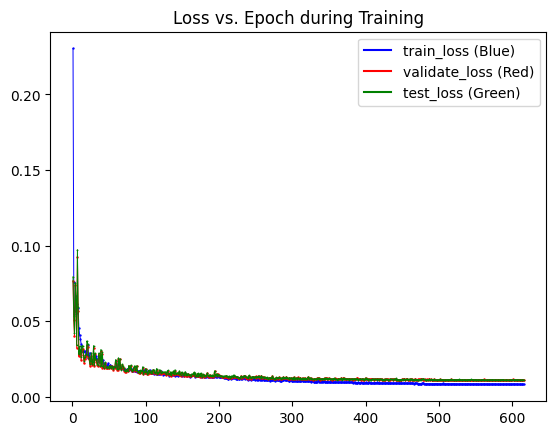

MAE=  0.10631758922843271


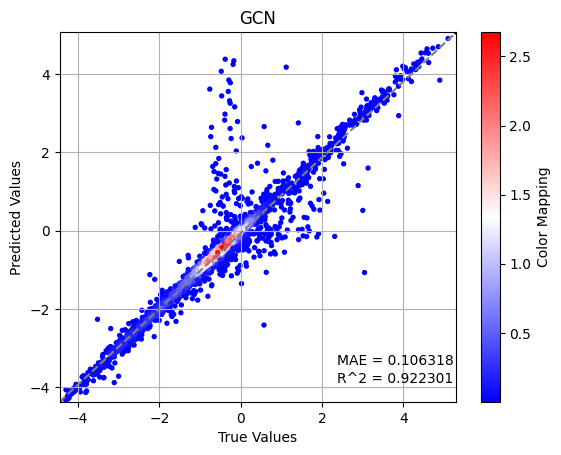

In [7]:
best_model = checkpoint["model"]

save_hyper_parameter(args, result_path)
save_train_progress(epoch - 1, train_losses, val_losses, test_losses, result_path)
test_loss, test_out, test_y = test_evaluations(best_model, test_loader, test_dataset, device, ret_data=True)

# Reverse normalization of test_out and y
min, max = get_data_scale(args)
test_y = reverse_min_max_scalar_1d(test_y, min, max)
test_out = reverse_min_max_scalar_1d(test_out, min, max)
loss = (test_out.squeeze() - test_y).abs().mean()
print("MAE loss of formation energy is: ", loss.item())

# save results
plot_training_progress(len(train_losses), train_losses, val_losses, test_losses, res_path=result_path)
save_regression_result(test_out, test_y, result_path)
plot_regression_result("GCN", result_path, plotfilename="regression_figure.jpeg")